<a href="https://colab.research.google.com/github/Codesmith900/DataScience/blob/main/MLP_Design_and_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

In [2]:
#divide into test and train

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#Reshape and normalize the input data

x_train = x_train.reshape((60000, 784))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((10000, 784))
x_test = x_test.astype('float32') / 255

In [4]:
#Convert the labels to categorical format

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
#Define the MLP model architecture using the functional API

inputs = keras.layers.Input(shape=(784,))
x = keras.layers.Dense(16, activation='relu')(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(32, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.25)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                             

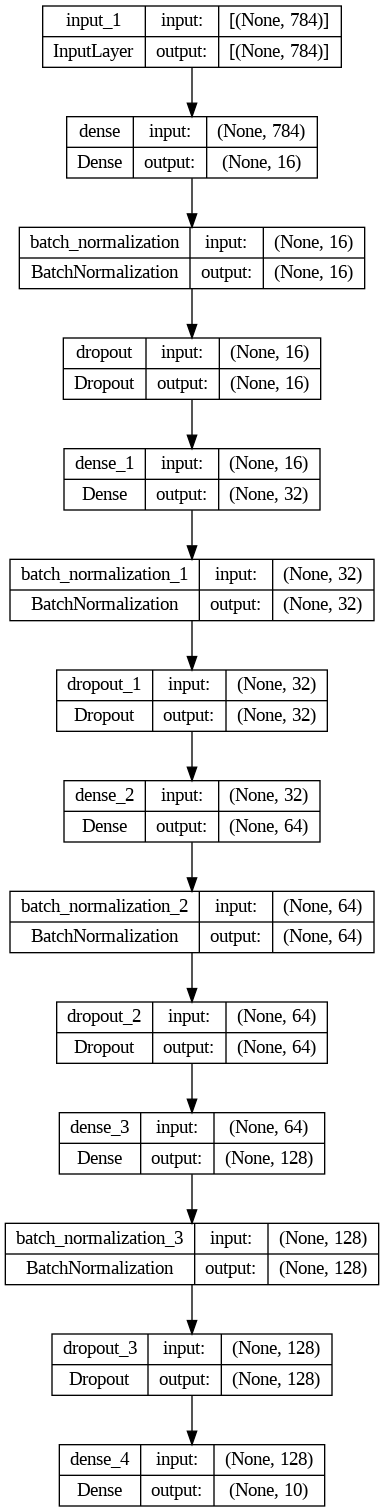

In [7]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [8]:
#Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#Train the model

history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 6s 6ms/step - loss: 0.9900 - accuracy: 0.6791 - val_loss: 0.3513 - val_accuracy: 0.8922
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.5478 - accuracy: 0.8326 - val_loss: 0.2927 - val_accuracy: 0.9110
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.4703 - accuracy: 0.8591 - val_loss: 0.2599 - val_accuracy: 0.9231
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4362 - accuracy: 0.8695 - val_loss: 0.2383 - val_accuracy: 0.9286
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4097 - accuracy: 0.8781 - val_loss: 0.2331 - val_accuracy: 0.9292
Epoch 6/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3888 - accuracy: 0.8862 - val_loss: 0.2300 - val_accuracy: 0.9326
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3809 - accuracy: 0.8881 - val_loss: 0.2251 - val_accuracy: 0.9345
Epoch 

In [10]:
#Evaluate the performance

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1825 - accuracy: 0.9476


[0.1825452744960785, 0.9476000070571899]

In [11]:
#prediction

model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


array([[3.8666702e-05, 5.7637069e-05, 5.6557613e-04, ..., 9.9634480e-01,
        1.5712791e-04, 2.0439213e-03],
       [2.3418971e-04, 1.6735436e-03, 9.9309808e-01, ..., 6.9826242e-04,
        7.4588013e-04, 1.2776517e-05],
       [2.6737878e-06, 9.9950475e-01, 3.5430225e-05, ..., 1.3020256e-04,
        2.1691500e-04, 2.3422284e-05],
       ...,
       [1.6829143e-04, 1.2156475e-05, 1.1964133e-03, ..., 9.0540823e-04,
        1.5582904e-04, 2.9355211e-03],
       [2.6965153e-04, 6.7583787e-05, 1.5534497e-04, ..., 2.7310067e-05,
        3.7032650e-03, 2.4083417e-04],
       [2.8385901e-05, 1.5174987e-06, 1.4693438e-04, ..., 2.3698055e-06,
        5.2445706e-05, 7.2037060e-06]], dtype=float32)

In [12]:
#Evaluate the model on the test set

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred == y_true)
print(f'Test Accuracy: {accuracy:.4f}')

313/313 [==============================] - 0s 1ms/step
Test Accuracy: 0.9476


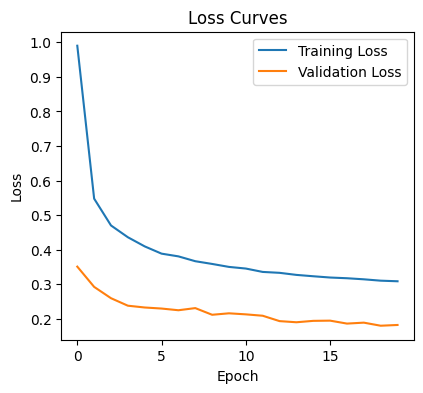

In [13]:
#Plot the loss curves

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

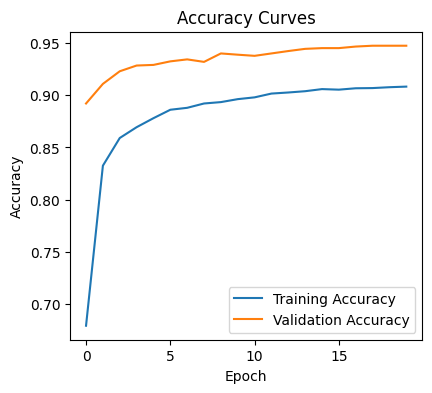

In [14]:
#Plot the accuracy curves

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

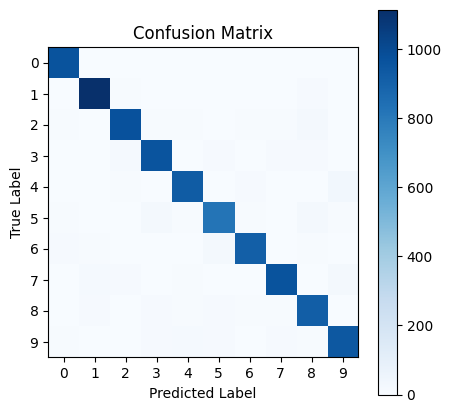

In [15]:
#Plot the confusion matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



1/1 [==============================] - 0s 20ms/step


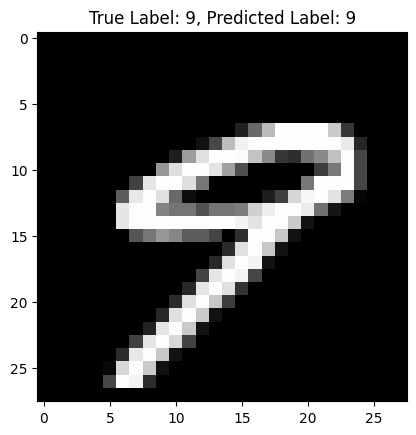

1/1 [==============================] - 0s 19ms/step


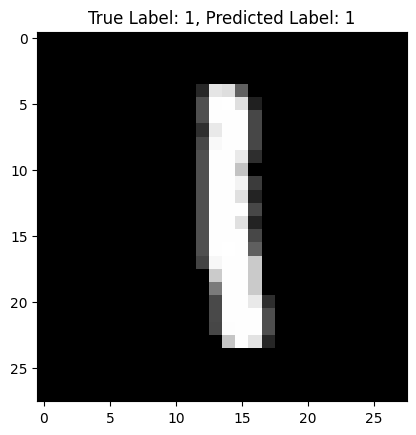

1/1 [==============================] - 0s 23ms/step


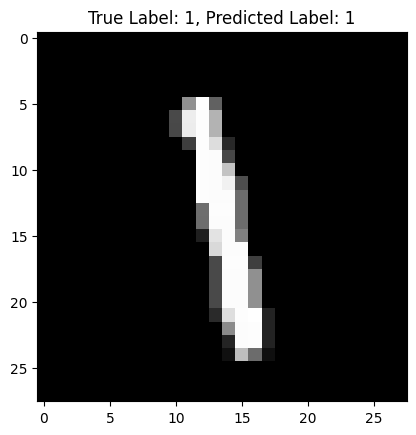

1/1 [==============================] - 0s 19ms/step


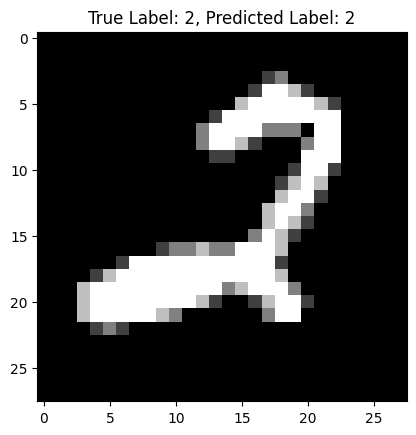

1/1 [==============================] - 0s 19ms/step


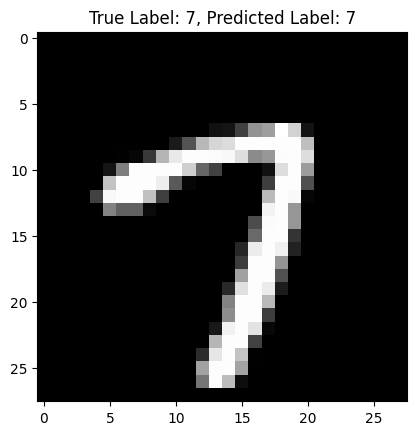

1/1 [==============================] - 0s 21ms/step


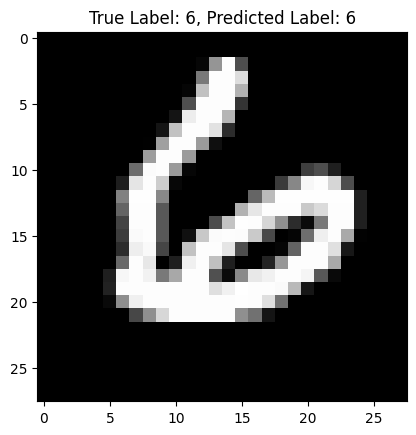

1/1 [==============================] - 0s 24ms/step


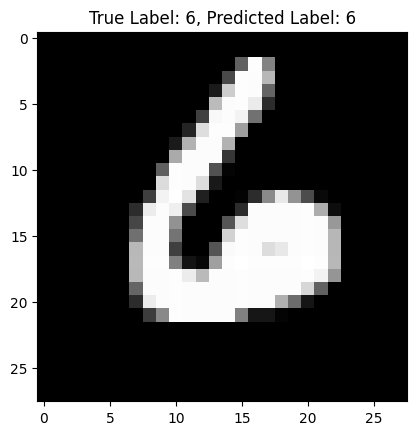

1/1 [==============================] - 0s 19ms/step


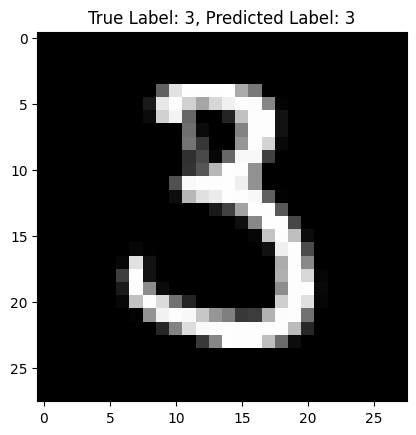

1/1 [==============================] - 0s 20ms/step


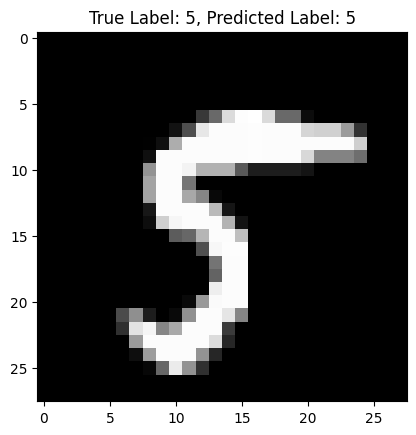

1/1 [==============================] - 0s 29ms/step


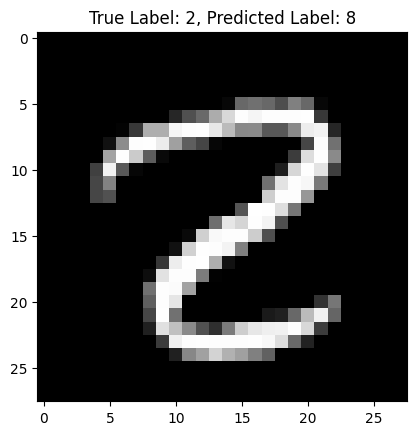

In [16]:
#Sample some predictions

import numpy as np
import matplotlib.pyplot as plt

indices = np.random.choice(range(len(x_test)), size=10, replace=False)
for index in indices:
    img = x_test[index].reshape((28, 28))
    true_label = np.argmax(y_test[index])
    pred_label = np.argmax(model.predict(x_test[index].reshape(1, 784)))
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(f'True Label: {true_label}, Predicted Label: {pred_label}')
    plt.show()
